## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ColabNotebooks/git_repos/Hackathon/
!pwd

/content/drive/MyDrive/ColabNotebooks/git_repos/Hackathon
/content/drive/MyDrive/ColabNotebooks/git_repos/Hackathon


In [4]:
df = pd.read_csv('AllData.csv')
df.head()

,Unnamed: 0,YYYY,MM,T,S,O,Q,time,longitude,latitude,slhf,ssr,sshf,str,u10,v10,t2m,WL
0,0,2010,1,10.4217,13.1786,11.0026,3563.3496,1/1/2010,-88,30.25,-11974237.0,11240919.0,-5648075.0,-8154515.0,0.234531,-2.100246,283.48636,-0.0568
1,1,2010,2,10.5447,6.2993,10.9593,4320.1324,2/1/2010,-88,30.25,-12521890.0,13475330.0,-4910544.0,-7808694.5,0.562316,-2.616675,283.71487,-0.0324
2,2,2010,3,14.9907,9.4933,10.2436,3501.9661,3/1/2010,-88,30.25,-8407296.0,17783600.0,-1657170.0,-7135715.5,1.164293,-0.404865,287.66162,-0.0513
3,3,2010,4,21.1904,16.4487,7.7550,1424.7409,4/1/2010,-88,30.25,-6459205.5,22470020.0,-197667.0,-7284165.0,-0.978213,1.734803,292.99527,-0.0092
4,4,2010,5,26.4007,11.1174,7.2505,2009.8534,5/1/2010,-88,30.25,-6227118.5,21909040.0,-311309.0,-5146405.0,-0.770677,2.386455,297.88720,0.1081


In [5]:
wspeed=np.sqrt((df["u10"])**2+(df["v10"])**2)

In [6]:
df["wspeed"]=wspeed
df

,Unnamed: 0,YYYY,MM,T,S,O,Q,time,longitude,latitude,slhf,ssr,sshf,str,u10,v10,t2m,WL,wspeed
0,0,2010,1,10.4217,13.1786,11.0026,3563.3496,1/1/2010,-88,30.25,-11974237.0,11240919.0,-5648075.00,-8154515.0,0.234531,-2.100246,283.48636,-0.0568,2.113300
1,1,2010,2,10.5447,6.2993,10.9593,4320.1324,2/1/2010,-88,30.25,-12521890.0,13475330.0,-4910544.00,-7808694.5,0.562316,-2.616675,283.71487,-0.0324,2.676413
2,2,2010,3,14.9907,9.4933,10.2436,3501.9661,3/1/2010,-88,30.25,-8407296.0,17783600.0,-1657170.00,-7135715.5,1.164293,-0.404865,287.66162,-0.0513,1.232677
3,3,2010,4,21.1904,16.4487,7.7550,1424.7409,4/1/2010,-88,30.25,-6459205.5,22470020.0,-197667.00,-7284165.0,-0.978213,1.734803,292.99527,-0.0092,1.991593
4,4,2010,5,26.4007,11.1174,7.2505,2009.8534,5/1/2010,-88,30.25,-6227118.5,21909040.0,-311309.00,-5146405.0,-0.770677,2.386455,297.88720,0.1081,2.507810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,2020,8,29.9715,23.6912,3.8627,520.0700,8/1/2020,-88,30.25,-10949816.0,19319842.0,-960672.25,-4826837.5,0.928800,1.917818,301.35266,0.2507,2.130891
128,128,2020,9,27.5463,20.9045,6.5446,856.2340,9/1/2020,-88,30.25,-17089144.0,15202278.0,-2272669.00,-4970964.5,-2.777308,-1.610658,299.62558,0.4202,3.210554
129,129,2020,10,24.0603,6.0111,7.7671,884.1720,10/1/2020,-88,30.25,-11413630.0,14949905.0,-1323107.20,-6176696.5,-1.990990,-0.963763,296.47370,0.3253,2.211986
130,130,2020,11,20.9030,21.3963,7.3999,968.3307,11/1/2020,-88,30.25,-12440210.0,12206130.0,-1814438.80,-6810243.5,-2.841156,-2.699009,293.25418,0.2330,3.918777


In [7]:
# Deleting NaN values
#df.replace(-99.90, np.nan, inplace=True)
drp_list=['YYYY','MM','time','longitude','latitude','Unnamed: 0']

for i in range(len(drp_list)):
  df.drop(drp_list[i], axis=1, inplace=True)
  df.dropna(inplace=True)
  df.reset_index(drop=True, inplace=True)
df.head()

,T,S,O,Q,slhf,ssr,sshf,str,u10,v10,t2m,WL,wspeed
0,10.4217,13.1786,11.0026,3563.3496,-11974237.0,11240919.0,-5648075.0,-8154515.0,0.234531,-2.100246,283.48636,-0.0568,2.113300
1,10.5447,6.2993,10.9593,4320.1324,-12521890.0,13475330.0,-4910544.0,-7808694.5,0.562316,-2.616675,283.71487,-0.0324,2.676413
2,14.9907,9.4933,10.2436,3501.9661,-8407296.0,17783600.0,-1657170.0,-7135715.5,1.164293,-0.404865,287.66162,-0.0513,1.232677
3,21.1904,16.4487,7.7550,1424.7409,-6459205.5,22470020.0,-197667.0,-7284165.0,-0.978213,1.734803,292.99527,-0.0092,1.991593
4,26.4007,11.1174,7.2505,2009.8534,-6227118.5,21909040.0,-311309.0,-5146405.0,-0.770677,2.386455,297.88720,0.1081,2.507810


## Visualization of the Features

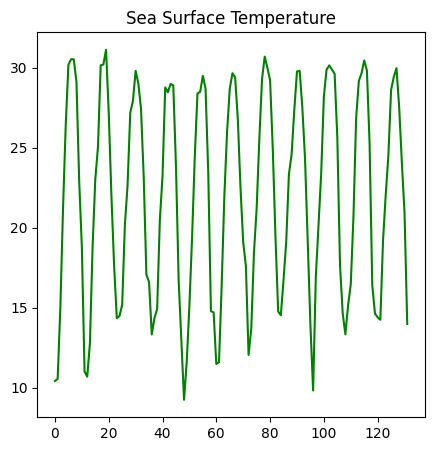

In [8]:
df_graph = df.loc[0:134]

plt.figure(figsize=(5,5))

plt.plot(df_graph['T'], color='green')
plt.title('Sea Surface Temperature')
plt.show();

## Initial Statistics

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       132 non-null    float64
 1   S       132 non-null    float64
 2   O       132 non-null    float64
 3   Q       132 non-null    float64
 4   slhf    132 non-null    float64
 5   ssr     132 non-null    float64
 6   sshf    132 non-null    float64
 7   str     132 non-null    float64
 8   u10     132 non-null    float64
 9   v10     132 non-null    float64
 10  t2m     132 non-null    float64
 11  WL      132 non-null    float64
 12  wspeed  132 non-null    float64
dtypes: float64(13)
memory usage: 13.5 KB
None


In [10]:
df.describe()

,T,S,O,Q,slhf,ssr,sshf,str,u10,v10,t2m,WL,wspeed
count,132.000000,132.000000,132.000000,132.000000,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000
mean,22.019247,17.117248,7.795167,1663.838950,-1.000550e+07,1.651906e+07,-1.573446e+06,-5.952838e+06,-0.419750,0.303592,294.550816,0.124857,1.895431
std,6.514505,6.072541,1.564100,1477.597546,3.093118e+06,4.562791e+06,1.319940e+06,1.207291e+06,1.285006,1.534394,5.581366,0.110869,0.809895
min,9.245800,2.524600,3.862700,145.192100,-1.757958e+07,8.063030e+06,-6.469198e+06,-8.901192e+06,-3.478903,-3.138766,283.050800,-0.173400,0.128651
25%,16.102225,12.102250,6.496900,527.599100,-1.165849e+07,1.217733e+07,-2.167683e+06,-6.787813e+06,-1.424477,-0.918774,289.320163,0.059550,1.299075
50%,22.995100,17.863250,7.451250,1120.117450,-1.008480e+07,1.718160e+07,-1.063103e+06,-5.855284e+06,-0.527616,0.534163,294.961125,0.123300,1.903479
75%,28.630875,22.206150,9.079775,2646.995875,-8.164684e+06,2.080983e+07,-7.106208e+05,-4.967696e+06,0.320536,1.629988,300.210037,0.208100,2.459497
max,31.119700,27.963800,11.015500,7934.064000,-2.199602e+06,2.490166e+07,1.397515e+05,-3.042700e+06,3.151147,3.297226,302.635350,0.442800,4.685575


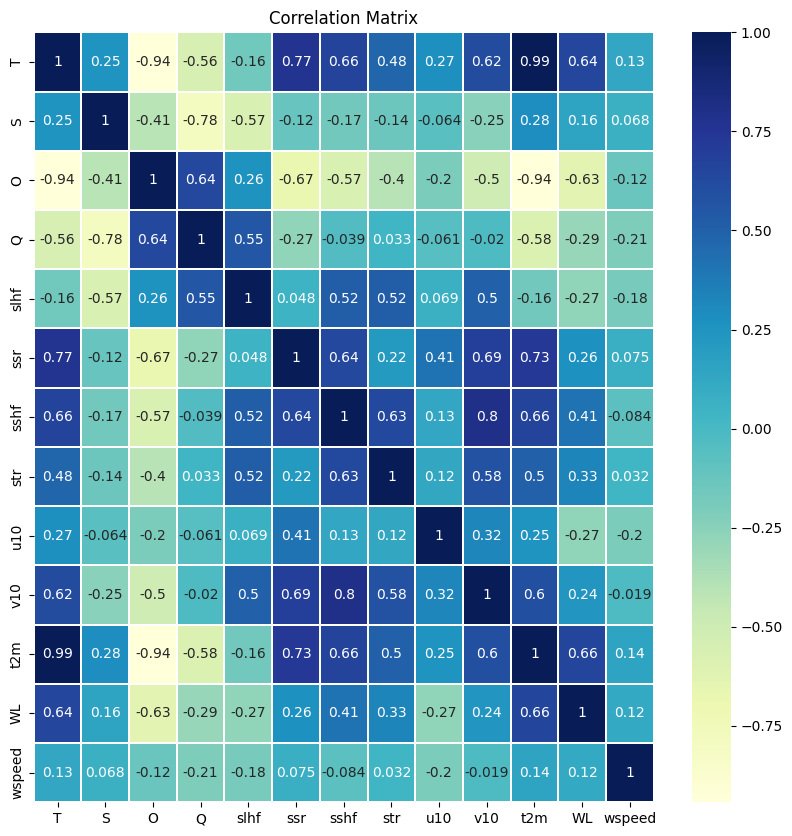

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show();
plt.savefig("corr_mat.tiff",dpi=300,transparent=False)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling all the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)
print('Shape of the scaled data matrix: ', data.shape)

Shape of the scaled data matrix:  (132, 13)


## Train and Test Split

In [ ]:
# Separate data into 2 groups for train and test
train = data[:108,]
test = data[108:,]
# Scaling all the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train)
test_data=scaler.fit_transform(test)
print('Shape of the scaled data matrix: ', data.shape)
# Shapes of our datasets
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of the scaled data matrix:  (132, 13)
Shape of train data:  (108, 13)
Shape of test data:  (24, 13)


In [ ]:
# Separate every 27 samples as the input and get the 28 sample as the output.

def prepare_data(data):
    databatch = 8
    x_list = []
    y_list = []
    
    for i in range(len(data)-databatch-1):
        x_list.append(data[i:i+databatch])
        y_list.append(data[i+databatch+1])
        
    X_data = np.array(x_list)

    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[2], X_data.shape[1]))
    y_data = np.array(y_list)
    
    return X_data, y_data


In [ ]:
# Executing the separation
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape[2], 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  8 y_train shape : (99, 13)
X_test Shape  :  (15, 13, 8)  y_test shape  : (15, 13)


## Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

def lstm_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    # Creating the model
    model = Sequential()
    # Adding the first layer
    model.add(LSTM(8, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    # Adding the second layer 
    model.add(LSTM(8, return_sequences=True))
    # # Adding a dropout value in order to prevent overfiting
    model.add(Dropout(0.2))
    # # Adding the third layer
    model.add(LSTM(8))
    # # Adding the output layer. 6 nodes are selected because the data has 6 features
    # model.add(Dense(6))
    
    # Choosing the optimizer
    optimizer = Adam(lr=learning_rate)
    
    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    # Fitting the model
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    
    return model, history

In [ ]:
history = lstm_model(X_train, y_train, num_epochs=10, batch_size=18, learning_rate=.001)

Epoch 1/10


ValueError: ignored

## Visualization of the Learning

NameError: ignored

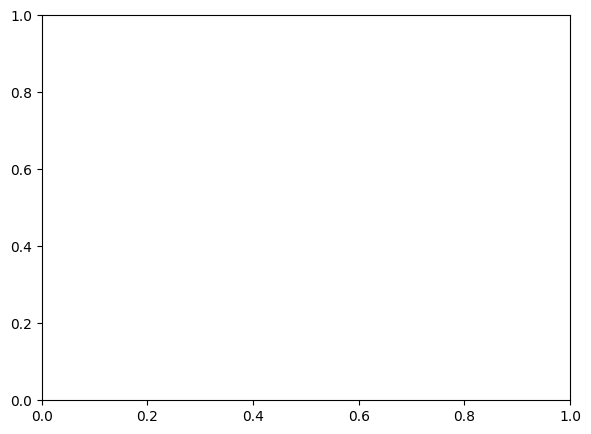

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history[1].history['accuracy'], color='blue', label='Train accuracy')
plt.plot(history[1].history['val_accuracy'], color='red', label='Validation accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history[1].history['loss'], color='blue', label='Train Loss')
plt.plot(history[1].history['val_loss'], color='red', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show();

## Predictions

In [ ]:
# Defining function to predict datas
def predicting(data, y_real):
    predicted_data = history[0].predict(data)
    # Invert scaling process to get the normal values range for the features 
    predicted_data = scaler.inverse_transform(predicted_data)
    y_real = scaler.inverse_transform(y_real)
    
    return predicted_data, y_real

In [ ]:
# Executing predictions
train_prediction, y_train = predicting(X_train, y_train)
test_prediction, y_test = predicting(X_test, y_test)

45/45 [==============================] - 0s 3ms/step


## Evaluating the Model Success

In [ ]:
# Defining function to investigate the root of mean squared errors (RMSE) between predicted and real data

import math
from sklearn.metrics import mean_squared_error

def examine_rmse(y_data, predicted_data):
    Score_SST = math.sqrt(mean_squared_error(y_data[:,5], predicted_data[:,5]))
    print('RMSE_SST      : ', Score_SST)

In [ ]:
# Executing the RMSE comparison
print('Training Data Errors')
print(examine_rmse(y_train, train_prediction),'\n')
print('Test Data Errors')
print(examine_rmse(y_test, test_prediction))

Training Data Errors
RMSE_SST      :  0.19159386835169823
None 

Test Data Errors
RMSE_SST      :  0.18236300512974413
None


## Visualization of the Real and Predicted Values

For the ease of understanding the model, the real and predicted datas are limited by 123 samples (Samples from 1300-1423). 

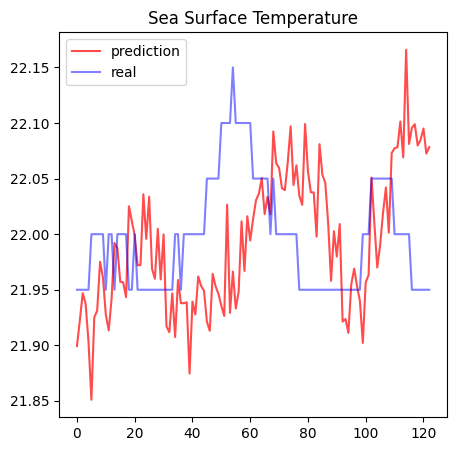

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(test_prediction[1300:,5], color='red', alpha=0.7, label='prediction')
plt.plot(y_test[1300:,5], color='blue', alpha=0.5, label='real')
plt.title('Sea Surface Temperature')
plt.legend()
plt.show();

## Conclusion

LSTM model is capable of predicting future values by looking at a defined batch of samples. 30 samples are used as a batch for the model in order to predict 31st sample. 


#### 0.2 degrees celcius of error for predicting the sea surface temperature (RMSE SST) is achieved. 

# <font color="green"> Exercise 

Now please work in groups to predict wave length using LSTMs.

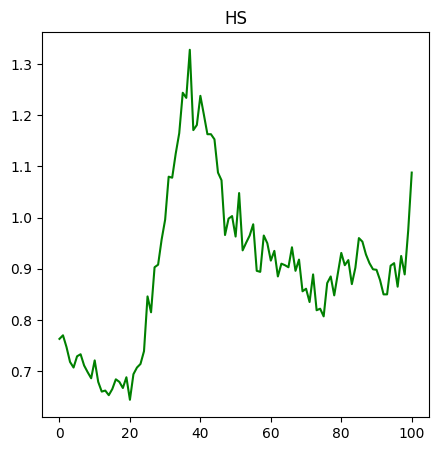

In [ ]:
df_graph = df.loc[0:100]

plt.figure(figsize=(5,5))

plt.plot(df_graph['Hs'], color='green')
plt.title('HS')
plt.show();

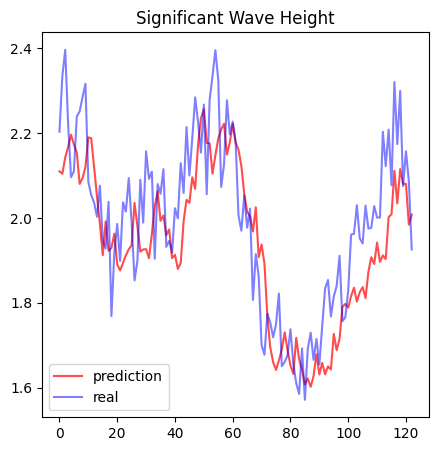

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(test_prediction[1300:,0], color='red', alpha=0.7, label='prediction')
plt.plot(y_test[1300:,0], color='blue', alpha=0.5, label='real')
plt.title('Significant Wave Height')
plt.legend()
